<a href="https://colab.research.google.com/github/Njeri-Gitome/Telco_Customer_Churn_Model/blob/main/Customer_Churn_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Libraries
import pandas as pd

#mount drive
from google.colab import drive
drive.mount('/content/drive')

#Loading data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Telco_Churn/preprocessed_telco.csv')

Mounted at /content/drive


In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [3]:
#drop the customerID column
data.drop(columns =['customerID'], inplace =True)

### Visualization or correlation of the variables with Churn

<Axes: >

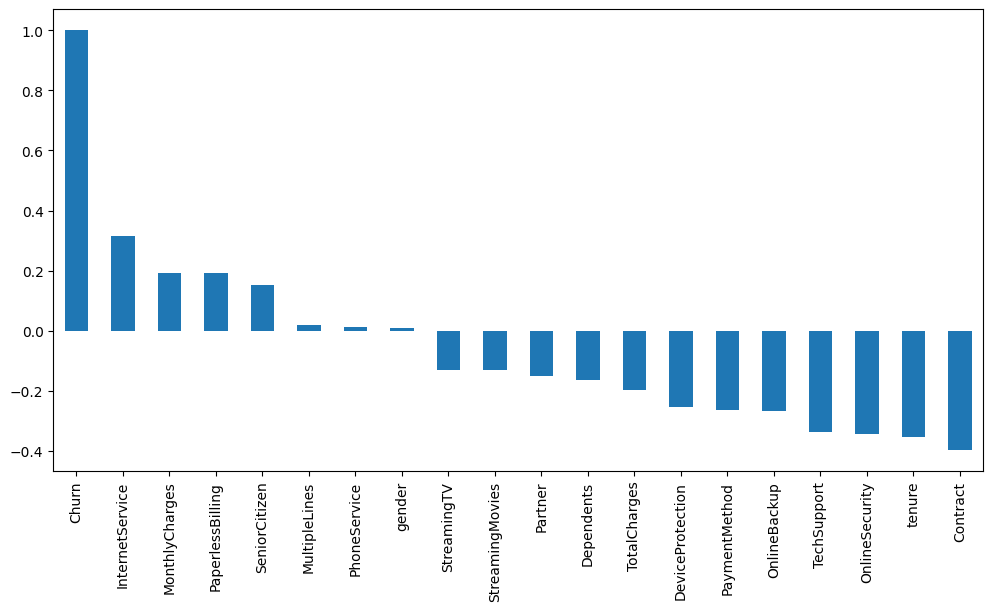

In [4]:
import matplotlib.pyplot as plt

#Barplot
plt.figure(figsize = (12,6))
data.corr()['Churn'].sort_values(ascending = False).plot(kind ='bar')

The bar plot above shows each value in correlation to the Churn column in descending order

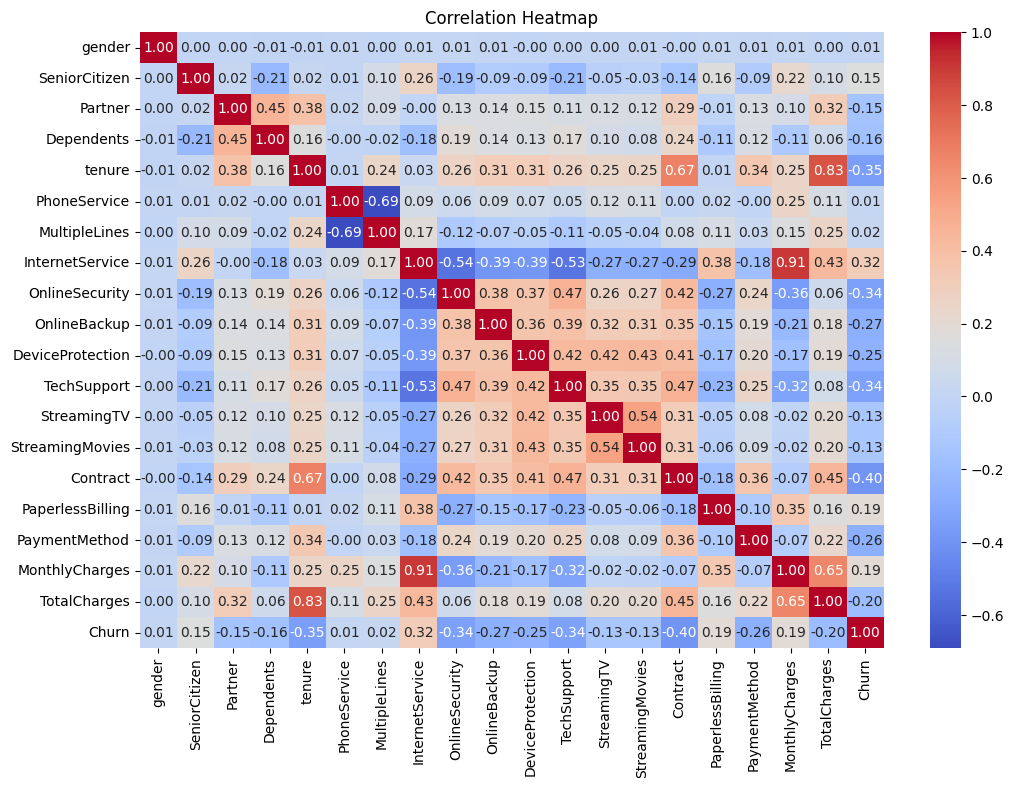

In [5]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [6]:
#Target variables
y = data['Churn']

In [7]:
# Features
X = data.drop(columns = ['Churn'])

In [8]:
X.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50


# Modelling

In [31]:
Models = [] #empty list


### Spliting the training set

In [9]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state =42)

In [10]:
# Check the shapes of the training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 19)
(2113, 19)
(4930,)
(2113,)


In [11]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score, roc_curve, roc_auc_score

# User defined function to print the evaluation metrics
def evaluation (model, X_test, y_test):
  y_predicted_model = model.predict(X_test)     #make predictions
  y_probabilities = model.predict_proba(X_test)[:,1]

  print('Precision: ', precision_score(y_test, y_predicted_model))
  print('Recall: ', recall_score(y_test, y_predicted_model))
  print('F1 Score: ', f1_score(y_test, y_predicted_model))
  print('ROC AUC Score: ', roc_auc_score(y_test, y_probabilities))

  #figure size
  plt.figure(figsize = (12,6))

  #confusion matrix
  plt.subplot(121)    #a subplot with 1 row and two columns and selects first subplot (1st column)
  confusion_mat = confusion_matrix(y_test, y_predicted_model)
  sns.heatmap(confusion_mat, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title ('CONFUSION MATRIX')
  plt.ylabel ('True Values')
  plt.xlabel('Predicted Values')

  #roc_auc_score
  model_roc_auc = roc_auc_score(y_test, y_probabilities)
  fpr, tpr,thresholds = roc_curve(y_test, y_probabilities)

  plt.subplot(122)   #a subplot with 1 row and two columns and selects secondsubplot (2nd column)
  plt.plot(fpr, tpr, color='navy', lw=1, label = "Auc : %.3f" %model_roc_auc)
  plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")

  plt.show()

## 1. Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression

#initialize model
LR = LogisticRegression()

#Fit model
LR.fit(X_train_scaled, y_train)

LogisticRegression()

In [32]:
# Append the logistic model to the Models list
Models.append(LR)

Precision:  0.6735112936344969
Recall:  0.5714285714285714
F1 Score:  0.6182846371347784
ROC AUC Score:  0.8591034949614325


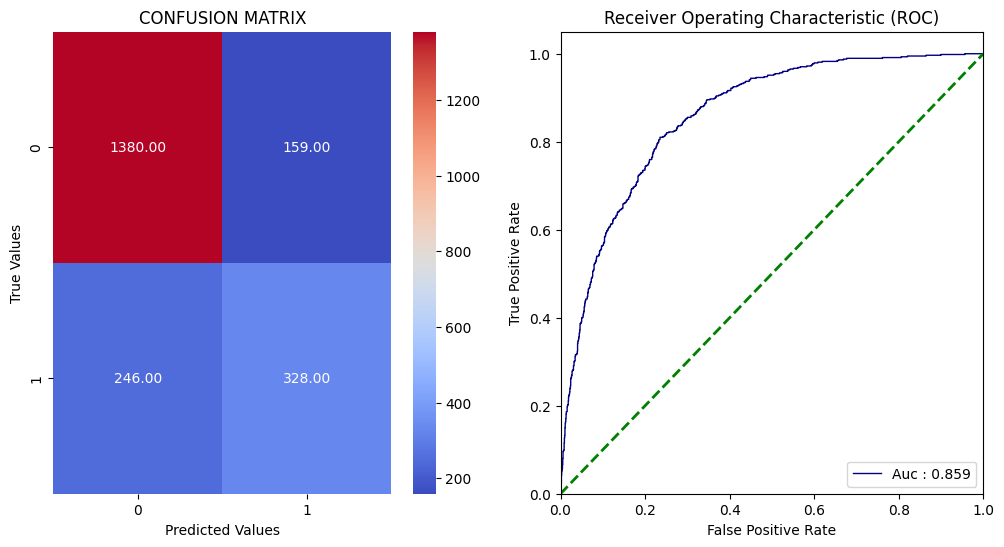

In [14]:
# Model evaluation

evaluation(LR, X_test_scaled, y_test)

## 2. Gaussian Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

#initialize model
GNB = GaussianNB()

#Fit model
GNB.fit(X_train,y_train)

GaussianNB()

In [33]:
# Append the Gaussian Naive Bayes model to the Models list
Models.append(GNB)

Precision:  0.5140291806958474
Recall:  0.7979094076655052
F1 Score:  0.6252559726962457
ROC AUC Score:  0.8318390828018556


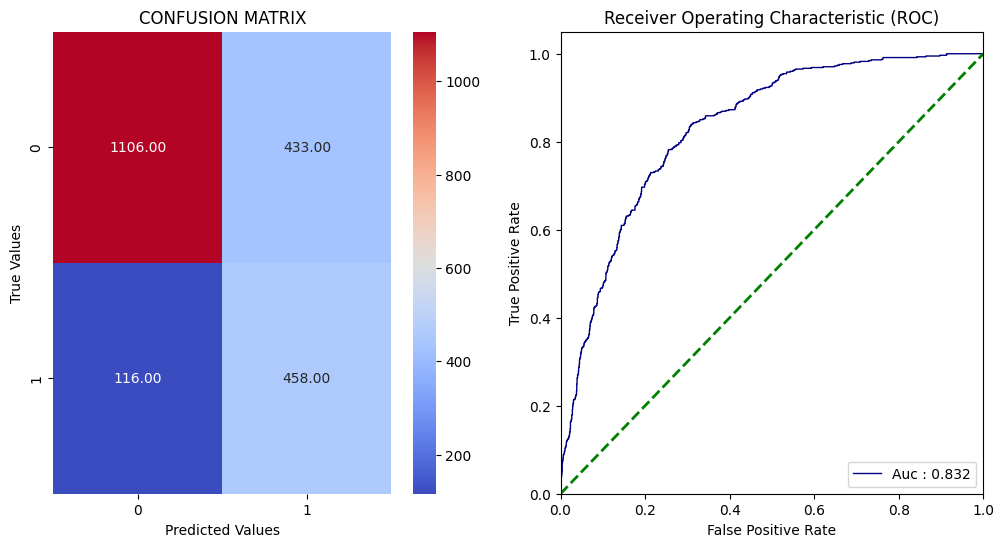

In [25]:
# Model evaluation

evaluation(GNB, X_test, y_test)

## 3. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

#initialize model
RF = RandomForestClassifier()

#Fit model
RF.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
# Append the Random Forest model to the Models list
Models.append(RF)

Precision:  0.6517412935323383
Recall:  0.4564459930313589
F1 Score:  0.5368852459016393
ROC AUC Score:  0.8354688663845703


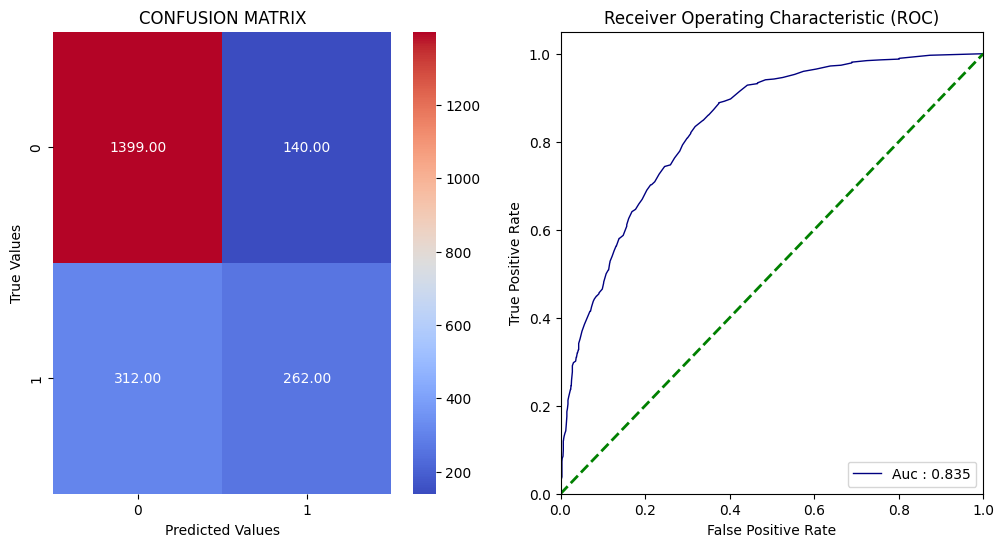

In [37]:
# Model evaluation
evaluation(RF, X_test, y_test)

## 4. XG Boost

In [19]:
from xgboost import XGBClassifier

#initialize model
XGB = XGBClassifier()

#Fit model
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
# Append the XGBoost model to the Models list
Models.append(XGB)

Precision:  0.6483516483516484
Recall:  0.5139372822299652
F1 Score:  0.5733722060252673
ROC AUC Score:  0.8304846352557093


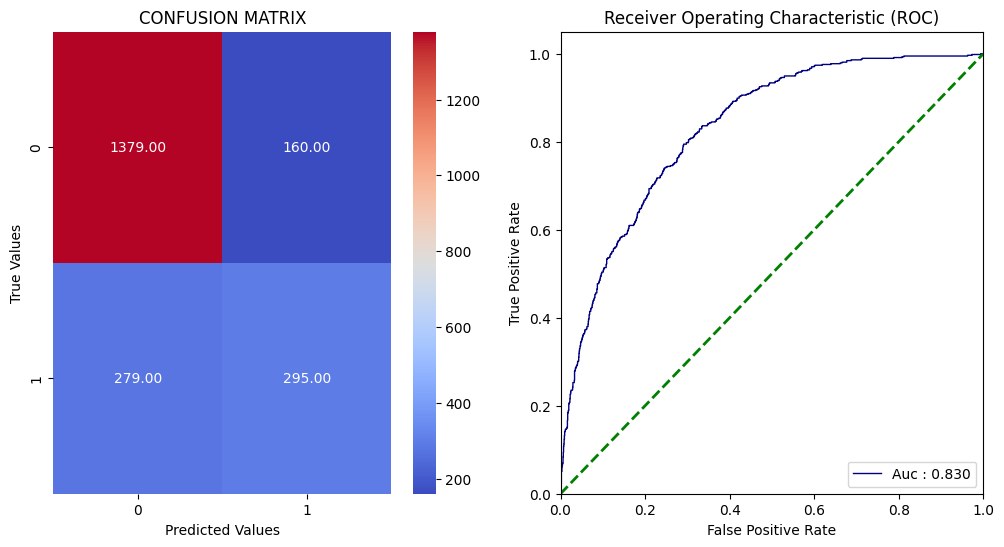

In [27]:
# Model evaluation
evaluation(XGB, X_test, y_test)

## 5. Gradient Boost Classifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

#initialize model
GBC = GradientBoostingClassifier()

#fit model
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [40]:
# Append the Gradient Boost Classifier model to the Models list
Models.append(GBC)

Precision:  0.6741071428571429
Recall:  0.5261324041811847
F1 Score:  0.5909980430528375
ROC AUC Score:  0.8592965023217484


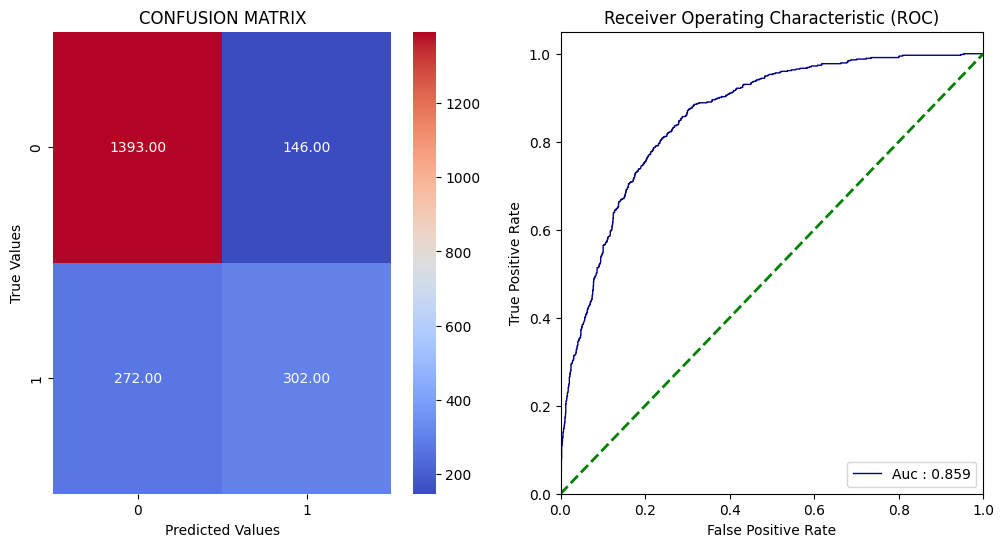

In [28]:
# Model evaluation
evaluation(GBC, X_test, y_test)

#6 Kernel SVM

In [43]:
from sklearn.svm import SVC

#initialize model
k_SVM = SVC(random_state =42, probability = True)

#fit model to the training data
k_SVM.fit(X_train,y_train)

SVC(probability=True, random_state=42)

In [44]:
# Append the SVM model to the Models list
Models.append(k_SVM)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:  0.0
Recall:  0.0
F1 Score:  0.0
ROC AUC Score:  0.8048480505690605


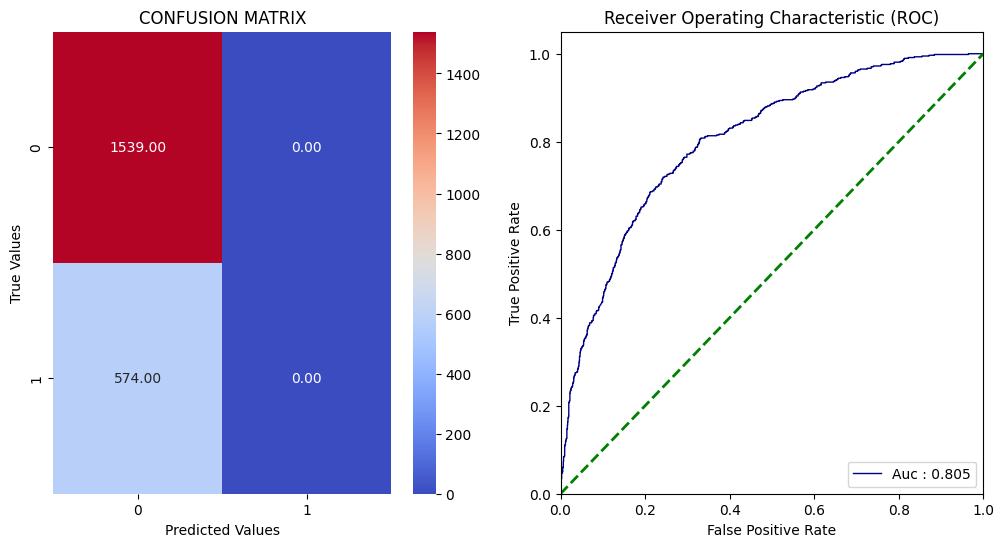

In [45]:
# Model evaluation
evaluation(k_SVM, X_test, y_test)

## Model Comparison

K-fold cross-validation methos is used for evaluating the models performance. The data is split into K subsets(folds). The model is trained and evluated K times, each time using a different fold as the test set and the remaining k-1 folds as the training set.


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score

#Initializing the dataframe where the results will be stored
col_names = ['Model','AUC Mean','Bal Acc Mean','Recall']
models_df = pd.DataFrame(columns=col_names)

i = 0

#Iterate over each model in in the Models list
for model in Models:
  kfold = StratifiedKFold(n_splits =10) #define the Stratified K-Fold cross-validator

  #Performing corss-validation for each metric
  balanced_acc = cross_val_score(model, X_train, y_train, cv=kfold, scoring ='balanced_accuracy')
  roc_acc =cross_val_score(model, X_train, y_train, cv=kfold, scoring ='ROC_AUC')




